In [513]:
# Handling imbalanced data in customer churn prediction

In [514]:
'''Customer churn prediction is to measure why customers are leaving a business. 
In this tutorial we will be looking at customer churn in telecom business. 
We will build a deep learning model to predict the churn and use precision,recall, f1-score 
to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score'''

'Customer churn prediction is to measure why customers are leaving a business. \nIn this tutorial we will be looking at customer churn in telecom business. \nWe will build a deep learning model to predict the churn and use precision,recall, f1-score \nto measure performance of our model.\nWe will then handle imbalance in data using various techniques and improve f1-score'

In [515]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [516]:
import warnings
warnings.filterwarnings('ignore')

In [517]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5931,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
2600,2262-SLNVK,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,70.10,70.1,No
2655,9565-DJPIB,Female,0,No,Yes,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,89.60,365.65,Yes
686,5313-FPXWG,Male,0,No,No,51,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.60,1266.4,No
3460,2669-OIDSD,Female,0,Yes,No,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.05,4834,No


In [518]:
# in Churn column, 'No' came 5174 times and 'Yes' came 1869 time
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [519]:
517400/df.shape[0]

73.46301292063042

In [520]:
# First of all, drop customerID column as it is of no use

In [521]:
df.drop('customerID',axis='columns',inplace=True)

In [522]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [523]:
'''TotalCharges should be float but it is an object. 
Let's check what's going on with  this column'''

"TotalCharges should be float but it is an object. \nLet's check what's going on with  this column"

In [524]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(7043,), dtype=object)

In [525]:
# Ahh... it is string. Lets convert it to numbers

In [526]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [527]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [528]:
df.shape

(7043, 20)

In [529]:
df.iloc[488].TotalCharges

' '

In [530]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [531]:
# Remove rows with space in TotalCharges

In [532]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [533]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [534]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [535]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ],
      shape=(7032,))

In [536]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [537]:
# Data Visualization

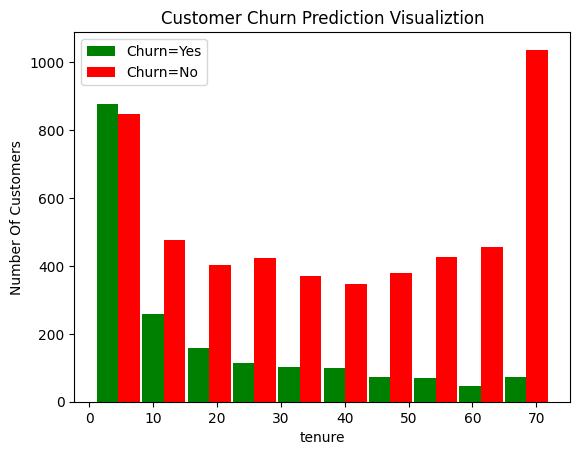

In [538]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

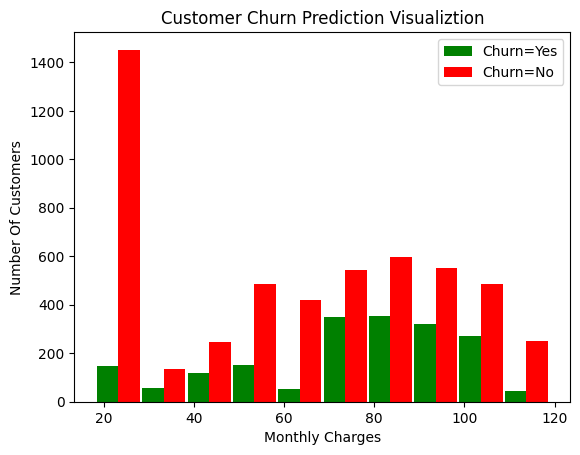

In [539]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [540]:
# Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [541]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [542]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [543]:
# Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [544]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [545]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [546]:
# Convert Yes and No to 1 or 0

In [547]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [548]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [549]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [550]:
df1.gender.unique()

array([1, 0])

In [551]:
# One hot encoding for categorical columns

In [552]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [553]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2667,1,0,0,0,72,1,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
285,1,0,0,0,22,1,1,0,0,0,...,False,True,False,False,True,False,False,True,False,False
3147,1,0,1,0,15,1,0,1,0,1,...,False,True,False,True,False,False,False,False,True,False
1838,0,1,0,0,54,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
3875,0,1,1,1,41,1,1,0,1,1,...,False,True,False,False,True,False,False,False,True,False


In [554]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [555]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [556]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [557]:
# Train test split

In [558]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [559]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [560]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [561]:
5163/1869

2.7624398073836276

In [562]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [563]:
X_train.shape

(5625, 26)

In [564]:
X_test.shape

(1407, 26)

In [565]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2446,1,0,0,0,0.239437,1,1,0,1,0,...,False,True,False,True,False,False,False,True,False,False
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
2220,0,0,1,0,1.000000,1,0,1,1,0,...,True,False,False,False,False,True,True,False,False,False
2842,1,0,0,0,0.042254,0,0,1,0,1,...,True,False,False,True,False,False,False,False,False,True
5131,1,0,1,0,0.605634,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
4372,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,True,False,False,False
4687,0,0,1,0,0.295775,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2385,1,0,0,1,0.028169,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6773,0,1,1,0,0.507042,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [566]:
len(X_train.columns)

26

In [567]:
# Build a model (ANN) in tensorflow/keras

In [568]:
# Method 1 - using class_weight = weights within Neural Network itself.

In [569]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [570]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [571]:
'''

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

This block trains and evaluates the neural network model.
The "weights" variable is used as a flag to decide whether class weights
should be applied during training.

If weights == -1:
    - The model is trained normally without using class weights.
    - This is suitable when the dataset is balanced.

# train using class weights to fix imbalance
model.fit(X_train, y_train, epochs=100):
    - X_train: training input features
    - y_train: training target labels
    - epochs=100: the model sees the entire training dataset 100 times
    class_weight=weights:
This is used when you have imbalanced classes (e.g., 90% of samples are class 0 and 10% are class 1). 
class_weight is a dictionary that tells the model to give more importance to underrepresented classes.

After training, the model is evaluated on the test dataset.

'''


'\n\n    if weights == -1:\n        model.fit(X_train, y_train, epochs=100)\n    else:\n        model.fit(X_train, y_train, epochs=100, class_weight = weights)\n\nThis block trains and evaluates the neural network model.\nThe "weights" variable is used as a flag to decide whether class weights\nshould be applied during training.\n\nIf weights == -1:\n    - The model is trained normally without using class weights.\n    - This is suitable when the dataset is balanced.\n\n# train using class weights to fix imbalance\nmodel.fit(X_train, y_train, epochs=100):\n    - X_train: training input features\n    - y_train: training target labels\n    - epochs=100: the model sees the entire training dataset 100 times\n    class_weight=weights:\nThis is used when you have imbalanced classes (e.g., 90% of samples are class 0 and 10% are class 1). \nclass_weight is a dictionary that tells the model to give more importance to underrepresented classes.\n\nAfter training, the model is evaluated on the tes

In [572]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7513 - loss: 0.4949
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7899 - loss: 0.4296
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4216
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4180
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4155
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8032 - loss: 0.4132
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.4112
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4105
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8068 - loss: 0.4077
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4071
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8084 - loss: 0.4060
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [573]:
# Mitigating Skewdness of Data

In [574]:
# Method 2: Undersampling
'''Undersampling reduces the number of samples in the majority class to balance the dataset. 
It is faster and uses less memory but can lose important information.
The data is chosen either randomly or using algorithms that remove samples closest to the minority class.
'''

'Undersampling reduces the number of samples in the majority class to balance the dataset. \nIt is faster and uses less memory but can lose important information.\nThe data is chosen either randomly or using algorithms that remove samples closest to the minority class.\n'

In [575]:
# here 'Churn' has 2 classes, ie, class_0 = 0 and class_0 = 1
# 'Churn' has only two values 0, 1 which are basically two classes
# so total count of 0 in 'Churn' column will be stored in count_class_0 variable and 
# total count of 1 will be stored in count_class_1 variable.
count_class_0, count_class_1 = df1.Churn.value_counts()

# this is filtering churn = 0 rows (entire rows) and Churn = 1 rows (entire rows)

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [576]:
# by entire row above, i mean other features as well where Churn is 0 and 1.
df_class_0.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True


In [577]:
# count of 1 class in Churn 
count_class_1

1869

In [578]:
# count of 0 class in Churn 
count_class_0
#so, clearly this is majority class because it contains 5163 ones count

5163

In [579]:
# class 0 has imbalance
df_class_0.shape  # (rows,columns)

(5163, 27)

In [580]:
# class 1 has imbalance
df_class_1.shape # (rows,columns)

(1869, 27)

In [581]:
# Undersample 0-class and concat the DataFrames of both class
# df_class_0 (contains churn = 0 rows) is the majority class, which we undersample using same count of churn = 1.
# this ensures that count of 0 and 1 on both the classes remains the same.
# after undersampling we concatenate both the classes.
df_class_0_undersampled = df_class_0.sample(count_class_1)
df_undersampled = pd.concat([df_class_0_undersampled, df_class_1], axis=0)

print('Random under-sampling:')
print(df_undersampled.Churn.value_counts())
# now as u can see, both the classes contains same count of 0 and 1

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [582]:
df_undersampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
164,1,0,1,1,0.140845,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
5078,1,0,1,1,0.929577,1,1,1,0,1,...,False,True,False,False,True,False,True,False,False,False
838,0,0,0,0,0.492958,1,0,1,0,1,...,True,False,False,True,False,False,False,True,False,False
399,1,0,1,1,0.309859,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
4445,1,0,0,0,0.873239,1,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,0,0,0,0,0.154930,1,0,0,0,0,...,True,False,False,False,True,False,False,False,True,False
7026,1,0,0,0,0.112676,1,0,0,0,0,...,True,False,False,True,False,False,True,False,False,False
7032,0,1,0,0,0.000000,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
7034,1,0,0,0,0.929577,1,1,1,1,1,...,False,True,False,True,False,False,False,True,False,False


In [583]:
# stiil our df, ie, df_undersampled have features and target variable, so create X and y
X = df_undersampled.drop('Churn',axis='columns')
y = df_undersampled['Churn']

# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [584]:
# Number of classes in training Data
y_train.value_counts()

# after  'train_test_split' also the no. of samples of 0 and 1 are same.

Churn
0    1495
1    1495
Name: count, dtype: int64

In [585]:
# Classification report is in the last, Scroll down till the last epoch to watch the classification report

In [586]:
# we are training, model evaluation, and prediction using previously created ANN function
# no weights are passed. ie, weights = -1

In [587]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6853 - loss: 0.6224
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7505 - loss: 0.5310
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7555 - loss: 0.5051
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.4942
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7619 - loss: 0.4880
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.4866
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7659 - loss: 0.4827
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.4788
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.4778
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.4749
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - loss: 0.4742
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [588]:
'''Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. 
Score for class 0 reduced to 0.75 from 0.85 but that's ok. 
We have more generalized classifier which classifies both classes with similar prediction score'''

"Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. \nScore for class 0 reduced to 0.75 from 0.85 but that's ok. \nWe have more generalized classifier which classifies both classes with similar prediction score"

In [589]:
# Method3: Oversampling (Data Duplication)

In [590]:
'''Oversampling increases the number of samples in the minority class to balance the dataset. 
It avoids data loss but may cause overfitting and increase training time. 
The data is chosen by duplicating existing minority samples or 
generating new synthetic ones (SMOTE) based on nearby samples.'''

'Oversampling increases the number of samples in the minority class to balance the dataset. \nIt avoids data loss but may cause overfitting and increase training time. \nThe data is chosen by duplicating existing minority samples or \ngenerating new synthetic ones (SMOTE) based on nearby samples.'

In [591]:
# Oversample 1-class (minority class) as pwe the count of class 0 (majority class)
# and concat the DataFrames of both classes
# this is just duplicating random values in data.

df_class_1_oversampled = df_class_1.sample(count_class_0, replace=True)
df_oversampled = pd.concat([df_class_0, df_class_1_oversampled], axis=0)

print('Random over-sampling:')
print(df_oversampled.Churn.value_counts())

# as u can see both classes have same no.

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [592]:
X = df_oversampled.drop('Churn',axis='columns')
y = df_oversampled['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [593]:
# Number of classes in training Data
# after train_test_split also the classes have same no.
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [594]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7414 - loss: 0.5365
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7585 - loss: 0.4923
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7661 - loss: 0.4822
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7690 - loss: 0.4767
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.4713
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7743 - loss: 0.4686
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7751 - loss: 0.4650
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7754 - loss: 0.4618
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7797 - loss: 0.4585
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7831 - loss: 0.4551
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7856 - loss: 0.4516
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [595]:
'''Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. 
Score for class 0 reduced to 0.75 from 0.85 but that's ok.
We have more generalized classifier which classifies both classes with similar prediction score'''

"Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. \nScore for class 0 reduced to 0.75 from 0.85 but that's ok.\nWe have more generalized classifier which classifies both classes with similar prediction score"

In [596]:
# Method4: OverSampling ( USing SMOTE )
# SMOTE using KNN algorithm

In [597]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [598]:
# if we are looking only 'Churn' column there is imbalance.
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [599]:
from imblearn.over_sampling import SMOTE

# create new synthetic samples in minority class (class_1)
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [600]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [601]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [602]:
# Number of classes in testing data is the same.
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [603]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7246 - loss: 0.5497
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7770 - loss: 0.4681
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - loss: 0.4579
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.4500
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7907 - loss: 0.4441
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4410
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7943 - loss: 0.4367
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - loss: 0.4322
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: 0.4295
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4263
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8025 - loss: 0.4226
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━

In [604]:
# SMOTE Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** 
# Also over all accuracy improves from 0.78 to 0.80

In [605]:
## Method 5: Use of Ensemble with undersampling

In [606]:
'''
Ensemble in undersampling is a technique where multiple models are trained on different 
undersampled versions of the dataset, and their predictions are combined.
Instead of removing majority-class data once (and losing information), the majority class is 
undersampled differently each time, a model is trained on each subset, and the final prediction is 
made by voting or averaging across all models.
'''

'\nEnsemble in undersampling is a technique where multiple models are trained on different \nundersampled versions of the dataset, and their predictions are combined.\nInstead of removing majority-class data once (and losing information), the majority class is \nundersampled differently each time, a model is trained on each subset, and the final prediction is \nmade by voting or averaging across all models.\n'

In [607]:
df2.Churn.value_counts()
#there is an imbalance

Churn
0    5163
1    1869
Name: count, dtype: int64

In [608]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [609]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [610]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [611]:
# we can give 3 samples, because the difference is 3 times.
4130/ 1495

2.762541806020067

In [612]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [613]:
# df3 will contain X_train data (feature of X_train) and y_train (target of y_train) _ 80% data.
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,True,False,False,False,False,False,True,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,True,False,True,False,False,False,True,False,False,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,False,False,False,False,True,True,False,False,False,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,False,False,True,False,False,False,False,False,True,0


In [614]:
# filtering entire row where Churn = 0
# filtering entire row where Churn = 1
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [615]:
'''
Basically we are using 3 models to train 3 different batches.
The below function takes majority class, majority class, where we want to start, where we want to end - as inputs parameters.

we run first sample from start 0 to 1495th sample . this is because we are splitting the data of majority class by 3.
model1 --> class1(1495) + class0(0, 1495)

on second model we start from 1495 to 2990th sample
model2 --> class1(1495) + class0(1496, 2990)

on third model we start from 2990th sample to last sample ie, 4130
model3 --> class1(1495) + class0(2990, 4130)


After Splitting the data to 3 batches, after each batch we implement ANN
'''

'\nBasically we are using 3 models to train 3 different batches.\nThe below function takes majority class, majority class, where we want to start, where we want to end - as inputs parameters.\n\nwe run first sample from start 0 to 1495th sample . this is because we are splitting the data of majority class by 3.\nmodel1 --> class1(1495) + class0(0, 1495)\n\non second model we start from 1495 to 2990th sample\nmodel2 --> class1(1495) + class0(1496, 2990)\n\non third model we start from 2990th sample to last sample ie, 4130\nmodel3 --> class1(1495) + class0(2990, 4130)\n\n\nAfter Splitting the data to 3 batches, after each batch we implement ANN\n'

In [616]:

def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0) # makes the class balanced.
    X_train = df_train.drop('Churn', axis='columns') # Creates X and y ,and returns them. 
    y_train = df_train.Churn
    return X_train, y_train    

In [617]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6094 - loss: 0.6590
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.5262
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.4973
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.4885
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7635 - loss: 0.4834
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.4797
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7682 - loss: 0.4774
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.4758
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7692 - loss: 0.4732
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7739 - loss: 0.4710
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7749 - loss: 0.4689
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [618]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7120 - loss: 0.6068
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7569 - loss: 0.5089
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.4930
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.4868
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.4847
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 0.4797
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7639 - loss: 0.4779
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 0.4747
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7635 - loss: 0.4738
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7669 - loss: 0.4730
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7702 - loss: 0.4695
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [619]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6941 - loss: 0.6183
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7613 - loss: 0.5078
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.4891
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 0.4806
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7750 - loss: 0.4763
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746 - loss: 0.4732
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4704
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.4665
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7837 - loss: 0.4643
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.4609
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.4582
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

In [620]:
len(y_pred1)

1407

In [621]:
len(y_pred2)

1407

In [622]:
len(y_pred3)

1407

In [623]:
# calculating majority vote amongst y_pred1, y_pred2, y_pred3
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)): # going through 1407 samples each time
    
    #after adding 3 votes , if its > 1 , o/p is 1 _ else o/p is 0
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [624]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407



In [625]:
# f1-score for minority class 1 improved from 0.57 to 0.62. 
# The score for majority class 0 is suffering and reduced to 0.80 from 0.85 
# but at least there is some balance in terms of prediction accuracy across two classes